In [1]:
# 라이브러리
# 
import os
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")

In [3]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.width", 600)
pd.set_option("precision", 2)

In [4]:
plt.style.use("fivethirtyeight")
sns.set(font_scale=1.5)
sns.color_palette("bright")

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [5]:
os.listdir("./data")

['GS25.csv', 'weather.csv']

In [6]:
# 데이터 경로
weather_data_path = os.path.join("data","weather.csv")
gs_data_path = os.path.join("data", "GS25.csv")

In [7]:
gs_data_path

'data/GS25.csv'

In [8]:
weather = pd.read_csv(weather_data_path, encoding="cp949")
gs = pd.read_csv(gs_data_path, encoding="cp949")

In [9]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59113 entries, 0 to 59112
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bigcon_weather.tm       59113 non-null  int64  
 1   bigcon_weather.stn_id   59113 non-null  int64  
 2   bigcon_weather.pvn_nm   59113 non-null  object 
 3   bigcon_weather.bor_nm   59113 non-null  object 
 4   bigcon_weather.max_ta   58826 non-null  float64
 5   bigcon_weather.max_ws   58778 non-null  float64
 6   bigcon_weather.min_ta   58826 non-null  float64
 7   bigcon_weather.avg_ta   58814 non-null  float64
 8   bigcon_weather.avg_rhm  43913 non-null  float64
 9   bigcon_weather.avg_ws   58828 non-null  float64
 10  bigcon_weather.sum_rn   59059 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 5.0+ MB


In [10]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707786 entries, 0 to 2707785
Data columns (total 7 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   korea_cvs.pvn_nm    object
 1   korea_cvs.sale_dt   int64 
 2   korea_cvs.gen_cd    object
 3   korea_cvs.age_cd    object
 4   korea_cvs.category  object
 5   korea_cvs.adj_qty   int64 
 6   korea_cvs.bor_nm    object
dtypes: int64(2), object(5)
memory usage: 144.6+ MB


In [11]:
weather.head()

,bigcon_weather.tm,bigcon_weather.stn_id,bigcon_weather.pvn_nm,bigcon_weather.bor_nm,bigcon_weather.max_ta,bigcon_weather.max_ws,bigcon_weather.min_ta,bigcon_weather.avg_ta,bigcon_weather.avg_rhm,bigcon_weather.avg_ws,bigcon_weather.sum_rn
0,20160101,98,경기도,동두천시,6.5,3.8,-6.4,-0.2,74.0,0.9,0.0
1,20160102,98,경기도,동두천시,10.1,3.2,1.9,5.4,70.0,1.3,0.0
2,20160103,98,경기도,동두천시,9.0,2.4,2.1,4.7,82.0,0.7,0.0
3,20160104,98,경기도,동두천시,8.0,5.3,-3.0,1.9,55.0,2.2,0.0
4,20160105,98,경기도,동두천시,3.1,5.6,-6.4,-2.8,36.0,1.8,0.0


In [12]:
gs.tail()

,korea_cvs.pvn_nm,korea_cvs.sale_dt,korea_cvs.gen_cd,korea_cvs.age_cd,korea_cvs.category,korea_cvs.adj_qty,korea_cvs.bor_nm
2707781,경기도,20181230,M,40~59,과자,7,여주시이천시
2707782,경기도,20181231,F,00~19,맥주,7,여주시이천시
2707783,경기도,20181231,F,20~39,생리대,7,여주시이천시
2707784,경기도,20181231,F,60~99,생리대,7,여주시이천시
2707785,경기도,20181231,M,20~39,아이스크림,7,여주시이천시


In [13]:
print(weather.shape)
print(gs.shape)

(59113, 11)
(2707786, 7)


In [14]:
# NA, null값 확인
import missingno

<AxesSubplot:>

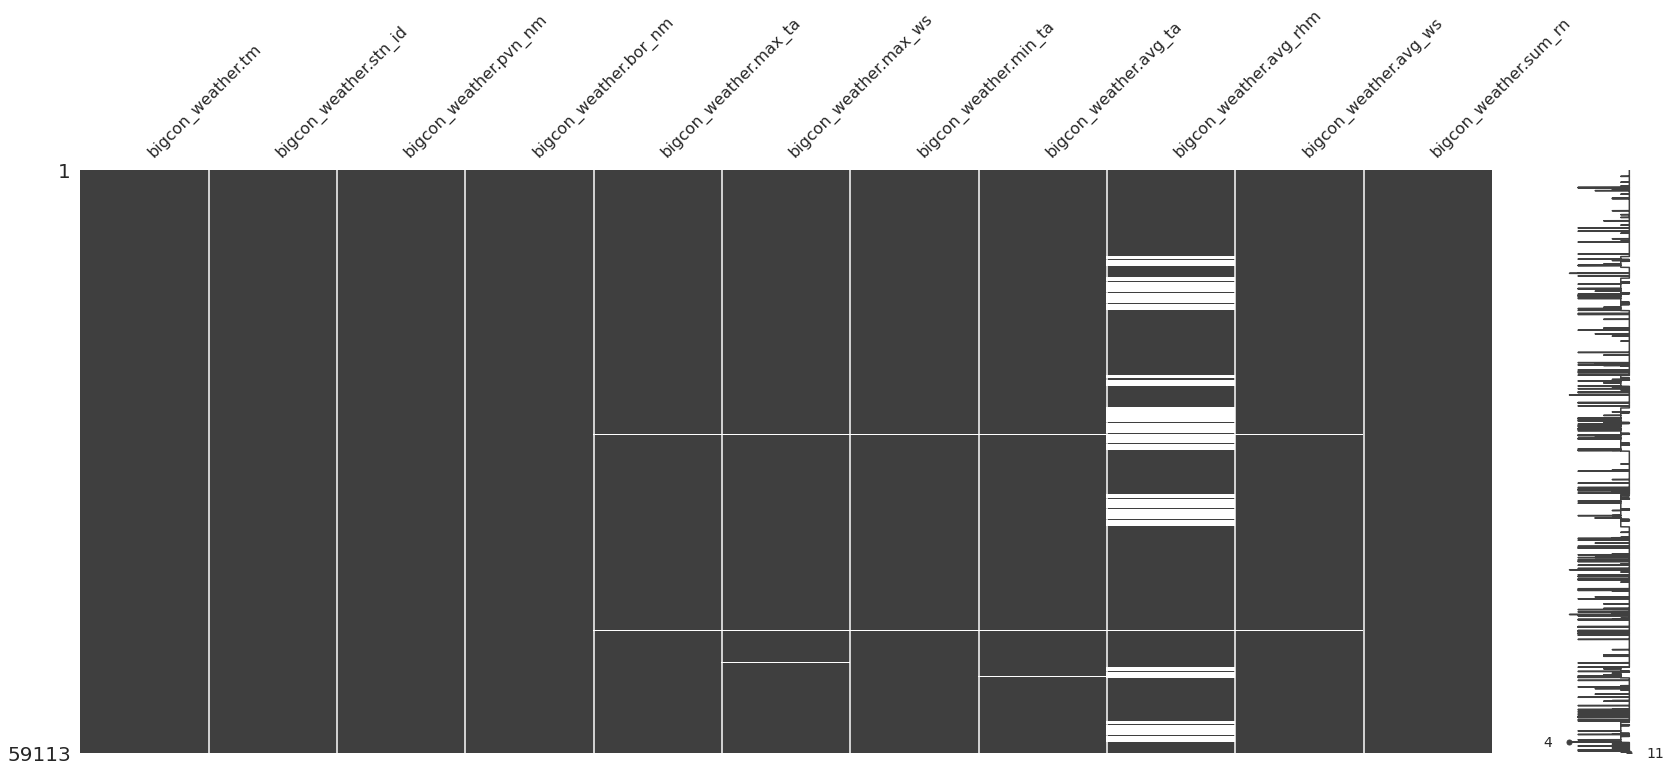

In [15]:
missingno.matrix(weather)

<AxesSubplot:>

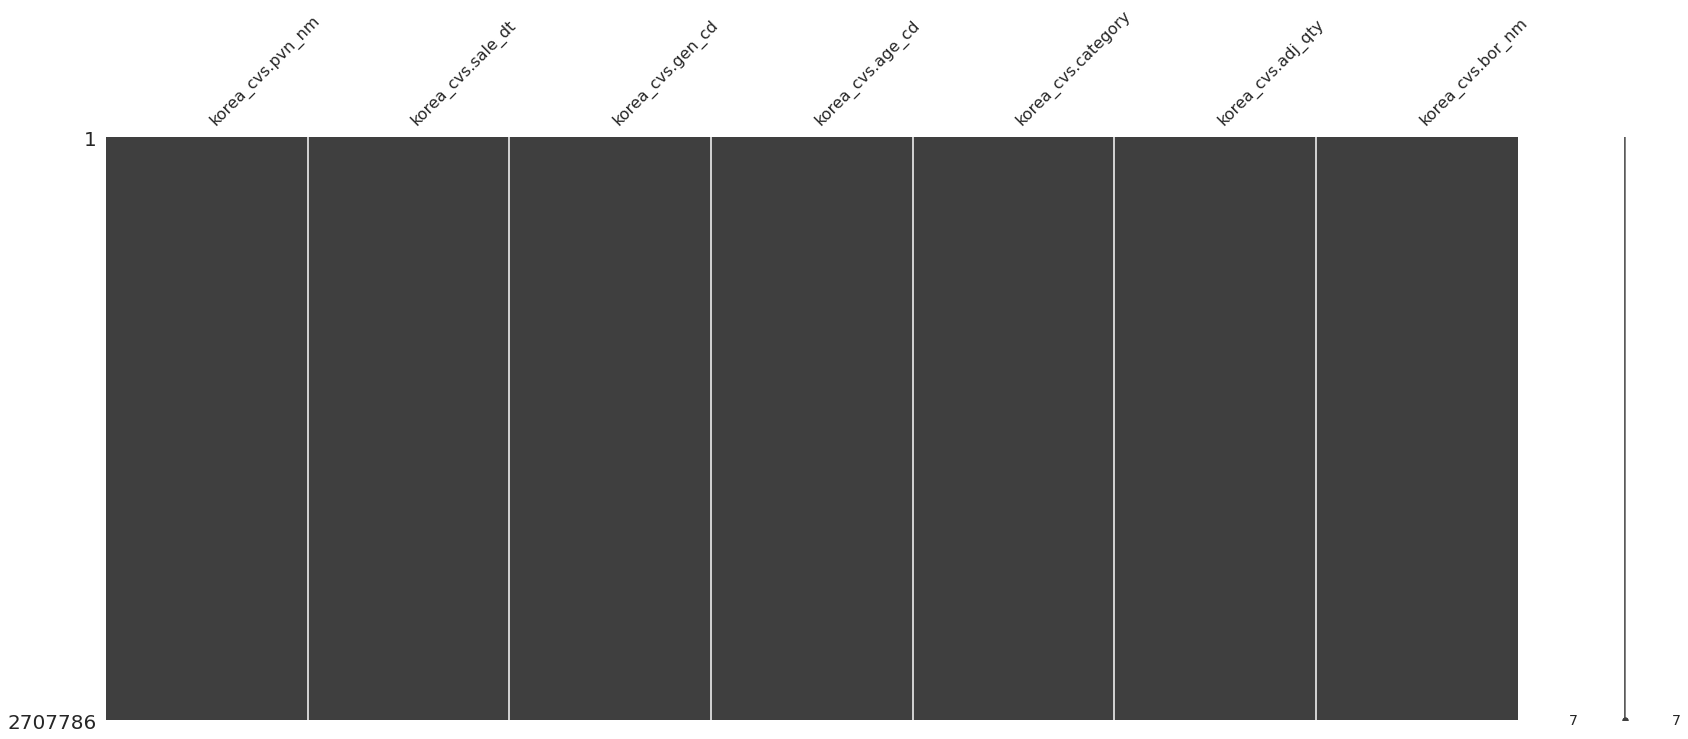

In [16]:
missingno.matrix(gs)

In [17]:
weather.isna().sum()

bigcon_weather.tm             0
bigcon_weather.stn_id         0
bigcon_weather.pvn_nm         0
bigcon_weather.bor_nm         0
bigcon_weather.max_ta       287
bigcon_weather.max_ws       335
bigcon_weather.min_ta       287
bigcon_weather.avg_ta       299
bigcon_weather.avg_rhm    15200
bigcon_weather.avg_ws       285
bigcon_weather.sum_rn        54
dtype: int64

In [18]:
# data -> dataframe
def na_value_check(data):
    na_value = data.isna().sum()
    na_ratio = round((na_value / len(data)) * 100, 2)
    return na_value, na_ratio

In [19]:
na_value, na_ratio = na_value_check(weather)

In [20]:
na_ratio

bigcon_weather.tm          0.00
bigcon_weather.stn_id      0.00
bigcon_weather.pvn_nm      0.00
bigcon_weather.bor_nm      0.00
bigcon_weather.max_ta      0.49
bigcon_weather.max_ws      0.57
bigcon_weather.min_ta      0.49
bigcon_weather.avg_ta      0.51
bigcon_weather.avg_rhm    25.71
bigcon_weather.avg_ws      0.48
bigcon_weather.sum_rn      0.09
dtype: float64

In [21]:
weather["bigcon_weather.bor_nm"].unique()

array(['동두천시', '파주시', '종로구', '수원시', '강화군', '양평군', '이천시', '강남구', '서초구',
       '강동구', '송파구', '강서구', '양천구', '도봉구', '노원구', '동대문구', '중랑구', '동작구',
       '마포구', '서대문구', '광진구', '성북구', '용산구', '은평구', '금천구', '중구', '성동구',
       '구로구', '강북구', '포천시', '관악구', '영등포구', '옹진군', '안성시', '가평군', '의정부시',
       '고양시', '남양주시', '안산시', '광주시', '여주시', '용인시', '오산시', '평택시', '시흥시',
       '구리시', '서구', '화성시', '성남시', '과천시', '양주시', '연수구', '부평구', '연천군'],
      dtype=object)

In [22]:
for i in weather["bigcon_weather.bor_nm"].unique():
    a = weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.avg_rhm"].mean()
    b = weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.avg_rhm"].fillna(a)
    weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.avg_rhm"] = b

In [23]:
for i in weather["bigcon_weather.bor_nm"].unique():
    a = weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.max_ta"].mean()
    b = weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.max_ta"].fillna(a)
    weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.max_ta"] = b

In [24]:
for i in weather["bigcon_weather.bor_nm"].unique():
    a = weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.max_ws"].mean()
    b = weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.max_ws"].fillna(a)
    weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.max_ws"] = b

In [25]:
for i in weather["bigcon_weather.bor_nm"].unique():
    a = weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.min_ta"].mean()
    b = weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.min_ta"].fillna(a)
    weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.min_ta"] = b

In [26]:
for i in weather["bigcon_weather.bor_nm"].unique():
    a = weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.avg_ta"].mean()
    b = weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.avg_ta"].fillna(a)
    weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.avg_ta"] = b

In [27]:
for i in weather["bigcon_weather.bor_nm"].unique():
    a = weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.avg_ws"].mean()
    b = weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.avg_ws"].fillna(a)
    weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.avg_ws"] = b

In [28]:
for i in weather["bigcon_weather.bor_nm"].unique():
    a = weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.sum_rn"].mean()
    b = weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.sum_rn"].fillna(a)
    weather.loc[weather["bigcon_weather.bor_nm"] == i, "bigcon_weather.sum_rn"] = b

In [29]:
weather.describe()

,bigcon_weather.tm,bigcon_weather.stn_id,bigcon_weather.max_ta,bigcon_weather.max_ws,bigcon_weather.min_ta,bigcon_weather.avg_ta,bigcon_weather.avg_rhm,bigcon_weather.avg_ws,bigcon_weather.sum_rn
count,5.91e+04,59113.00,59113.00,59113.00,59113.00,59113.00,59113.00,59113.00,59113.00
mean,2.02e+07,444.70,18.11,3.90,7.96,12.68,46.61,1.56,3.04
std,8.17e+03,137.66,11.08,1.41,11.18,10.86,31.57,0.77,12.29
min,2.02e+07,98.00,-12.60,0.00,-24.40,-18.10,0.00,0.00,0.00
25%,2.02e+07,406.00,8.50,2.90,-1.40,3.30,0.00,1.00,0.00
50%,2.02e+07,421.00,20.00,3.70,8.70,13.90,57.00,1.40,0.00
75%,2.02e+07,548.00,27.50,4.70,17.60,21.90,71.00,1.90,0.00
max,2.02e+07,652.00,41.80,15.70,31.80,34.40,100.00,9.50,327.50


## 시각화

In [30]:
weather.columns

Index(['bigcon_weather.tm', 'bigcon_weather.stn_id', 'bigcon_weather.pvn_nm', 'bigcon_weather.bor_nm', 'bigcon_weather.max_ta', 'bigcon_weather.max_ws', 'bigcon_weather.min_ta', 'bigcon_weather.avg_ta', 'bigcon_weather.avg_rhm', 'bigcon_weather.avg_ws', 'bigcon_weather.sum_rn'], dtype='object')

**************************************************
--bigcon_weather.max_ta--


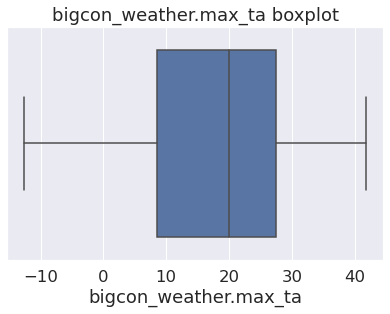

**************************************************
--bigcon_weather.max_ws--


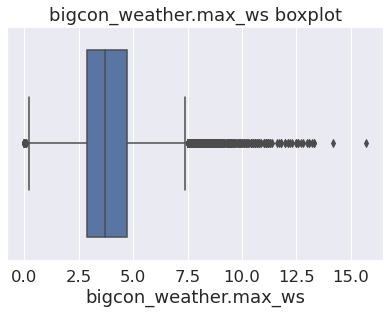

**************************************************
--bigcon_weather.min_ta--


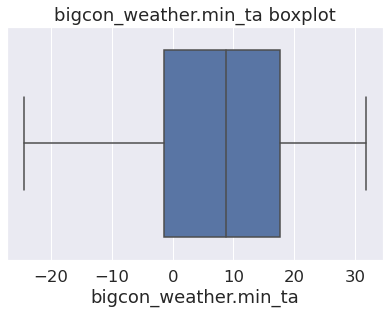

**************************************************
--bigcon_weather.avg_ta--


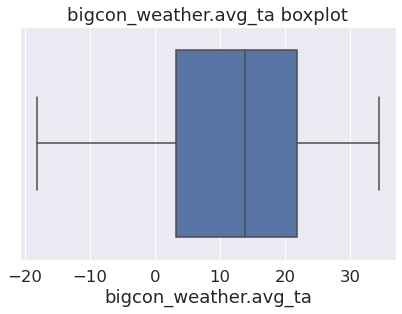

**************************************************
--bigcon_weather.avg_rhm--


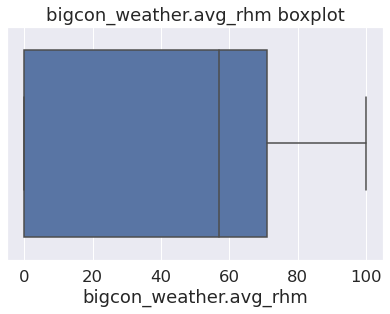

**************************************************
--bigcon_weather.avg_ws--


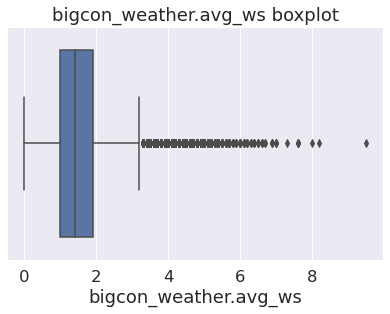

**************************************************
--bigcon_weather.sum_rn--


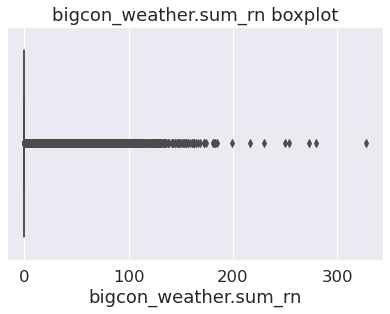

In [31]:
for col in weather.columns:
    # 날짜, id column은 스킵
    if col in ['bigcon_weather.tm', 'bigcon_weather.stn_id', 'bigcon_weather.pvn_nm', 'bigcon_weather.bor_nm']:
        continue
    print ("*" * 50)
    print (f"--{col}--")
   # sns.distplot(weather[col], kde=False)
    plt.title(f"{col} boxplot")
    sns.boxplot(weather[col], orient = 'v')
    plt.show()

In [32]:
# index 를 datetime으로 바꿔야 함
weather['bigcon_weather.tm'] = weather["bigcon_weather.tm"].map(lambda x : str(x))

In [33]:
weather.set_index(pd.to_datetime(weather["bigcon_weather.tm"]), inplace=True)

In [34]:
weather_2 = weather.copy()

In [35]:
weather.drop("bigcon_weather.tm", axis=1, inplace=True)

In [36]:
weather.head()

,bigcon_weather.stn_id,bigcon_weather.pvn_nm,bigcon_weather.bor_nm,bigcon_weather.max_ta,bigcon_weather.max_ws,bigcon_weather.min_ta,bigcon_weather.avg_ta,bigcon_weather.avg_rhm,bigcon_weather.avg_ws,bigcon_weather.sum_rn
bigcon_weather.tm,,,,,,,,,,
2016-01-01,98,경기도,동두천시,6.5,3.8,-6.4,-0.2,74.0,0.9,0.0
2016-01-02,98,경기도,동두천시,10.1,3.2,1.9,5.4,70.0,1.3,0.0
2016-01-03,98,경기도,동두천시,9.0,2.4,2.1,4.7,82.0,0.7,0.0
2016-01-04,98,경기도,동두천시,8.0,5.3,-3.0,1.9,55.0,2.2,0.0
2016-01-05,98,경기도,동두천시,3.1,5.6,-6.4,-2.8,36.0,1.8,0.0


<AxesSubplot:xlabel='bigcon_weather.tm'>

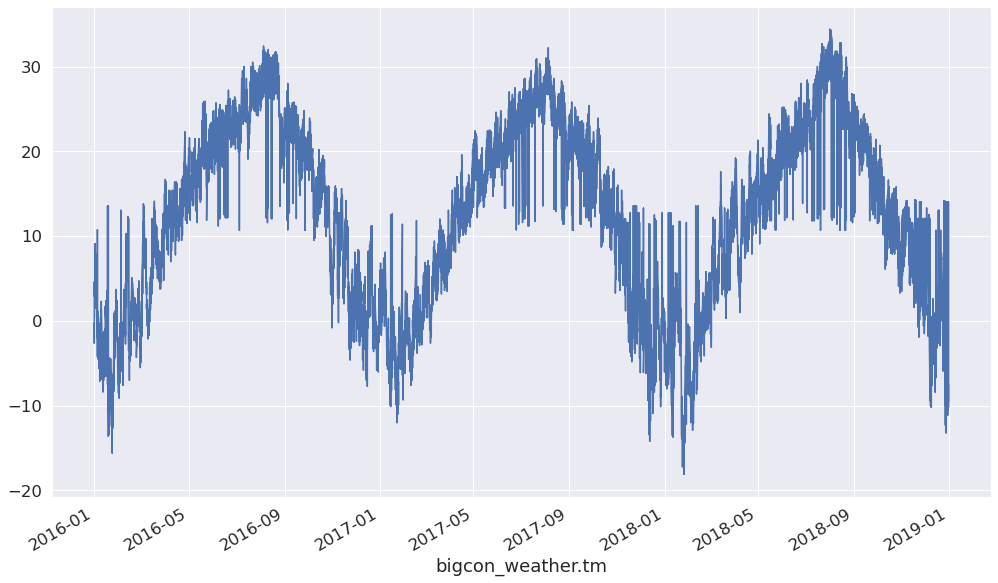

In [37]:
weather['bigcon_weather.avg_ta'].plot(figsize=(15,10))

<AxesSubplot:xlabel='bigcon_weather.tm'>

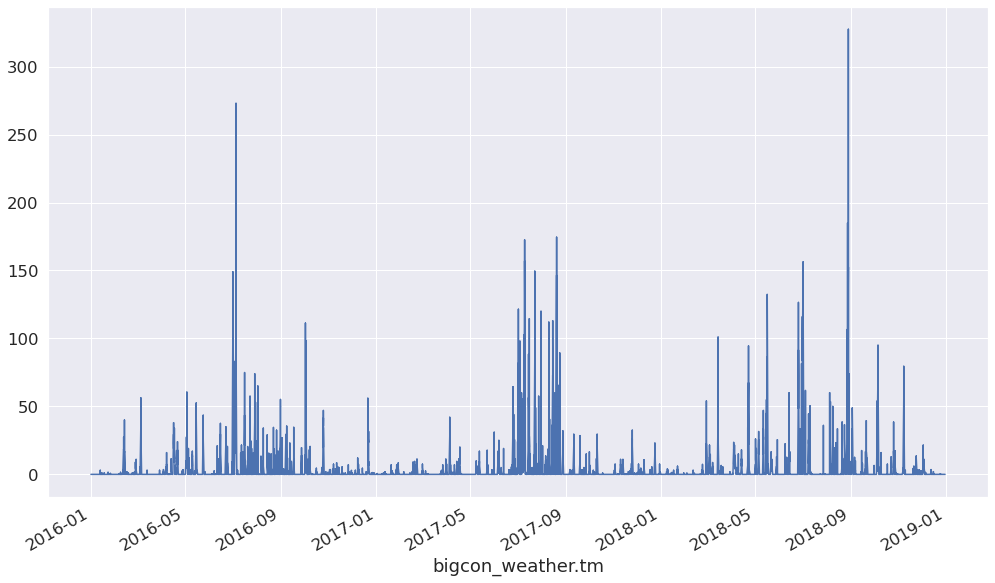

In [38]:
weather['bigcon_weather.sum_rn'].plot(figsize=(15,10))

In [39]:
weather['bigcon_weather.tm'].plot(figsize=(15,10))

KeyError: 'bigcon_weather.tm'

In [40]:
weather.columns

Index(['bigcon_weather.stn_id', 'bigcon_weather.pvn_nm', 'bigcon_weather.bor_nm', 'bigcon_weather.max_ta', 'bigcon_weather.max_ws', 'bigcon_weather.min_ta', 'bigcon_weather.avg_ta', 'bigcon_weather.avg_rhm', 'bigcon_weather.avg_ws', 'bigcon_weather.sum_rn'], dtype='object')

<AxesSubplot:xlabel='bigcon_weather.sum_rn', ylabel='bigcon_weather.max_ws'>

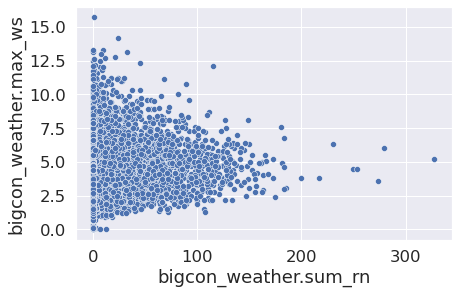

In [41]:
sns.scatterplot(x="bigcon_weather.sum_rn", y="bigcon_weather.max_ws", data=weather)

In [42]:
cor = weather.select_dtypes("float").corr()

<AxesSubplot:>

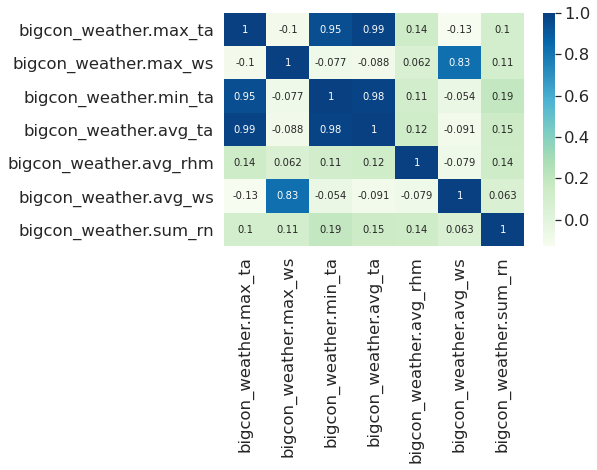

In [43]:
sns.heatmap(cor, cmap="GnBu", annot=True, annot_kws={"size" : 10})

In [44]:
weather.drop(['bigcon_weather.min_ta', 'bigcon_weather.max_ta'], axis = 1, inplace = True)

In [45]:
cor = weather.select_dtypes("float").corr()

<AxesSubplot:>

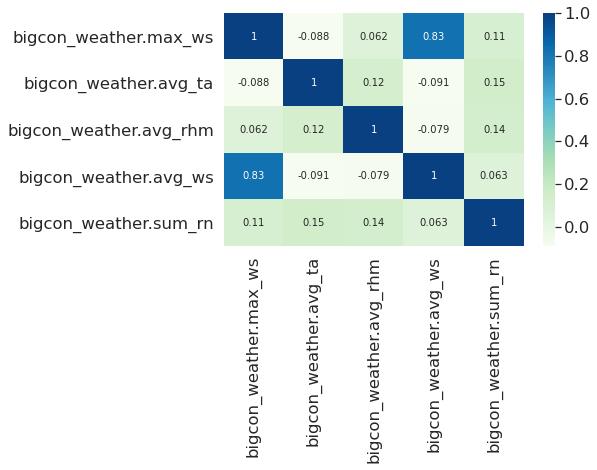

In [46]:
sns.heatmap(cor, cmap="GnBu", annot=True, annot_kws={"size" : 10})

In [47]:
# 유통데이터

In [48]:
gs.head()

,korea_cvs.pvn_nm,korea_cvs.sale_dt,korea_cvs.gen_cd,korea_cvs.age_cd,korea_cvs.category,korea_cvs.adj_qty,korea_cvs.bor_nm
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구
2,서울특별시,20160101,F,20~39,라면,282,종로구
3,서울특별시,20160101,F,20~39,마스크,35,종로구
4,서울특별시,20160101,F,20~39,맥주,183,종로구


In [55]:
for col in gs.columns:
    # column 이 아래의 것들이면 지나간다.
    if col in ["korea_cvs.sale_dt", "korea_cvs.adj_qty"]:
        continue
    print (f"col: (col)", gs[col].unique(),  "\t 변수의 개수 :", gs[col].unuique())

AttributeError: 'Series' object has no attribute 'unuique'

---------
------korea_cvs.pvn_nm-------


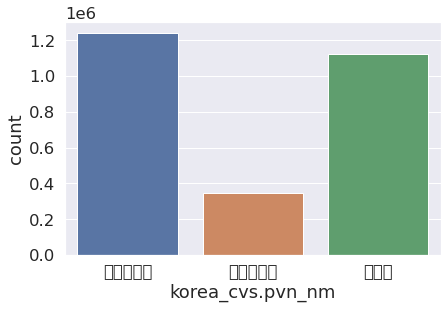

---------
------korea_cvs.gen_cd-------


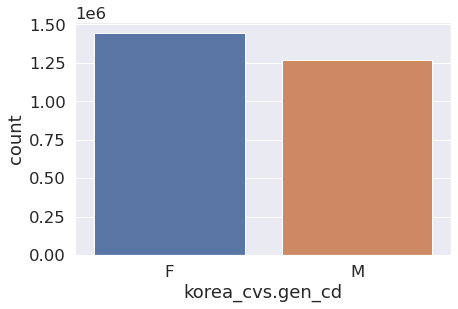

---------
------korea_cvs.age_cd-------


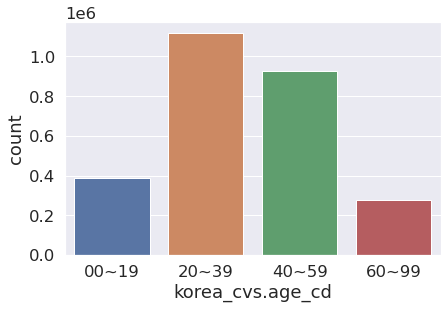

---------
------korea_cvs.category-------


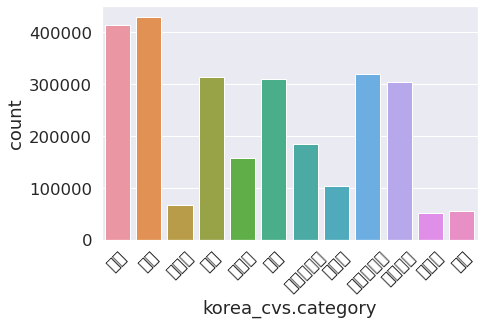

In [54]:
for col in gs.columns:
    if col in ["korea_cvs.sale_dt", "korea_cvs.adj_qty", "korea_cvs.bor_nm"]:
        continue
    print("---------")
    print(f"------{col}-------")
    
    if col == "korea_cvs.category":
        sns.countplot(col, data=gs)
        plt.xticks(rotation=45)
        plt.show()
        continue
    sns.countplot(col, data=gs)
    plt.show()

In [56]:
# 지역별로 나눠서
# 서울, 인천, 경기
# DataFrame[조건]
sub_set_01 = gs[gs["korea_cvs.pvn_nm"] == "서울특별시"]
sub_set_02 = gs[gs["korea_cvs.pvn_nm"] == "인천광역시"]
sub_set_03 = gs[gs["korea_cvs.pvn_nm"] == "경기도"]

In [57]:
sub_set_01.tail()

,korea_cvs.pvn_nm,korea_cvs.sale_dt,korea_cvs.gen_cd,korea_cvs.age_cd,korea_cvs.category,korea_cvs.adj_qty,korea_cvs.bor_nm
2599404,서울특별시,20181231,F,20~39,면도기,7,강동구
2599405,서울특별시,20181231,F,40~59,숙취해소제,7,강동구
2599406,서울특별시,20181231,M,40~59,생수,7,강동구
2599407,서울특별시,20181231,M,40~59,아이스크림,7,강동구
2599408,서울특별시,20181231,M,60~99,과자,7,강동구


In [58]:
plt.style.use("fivethirtyeight")

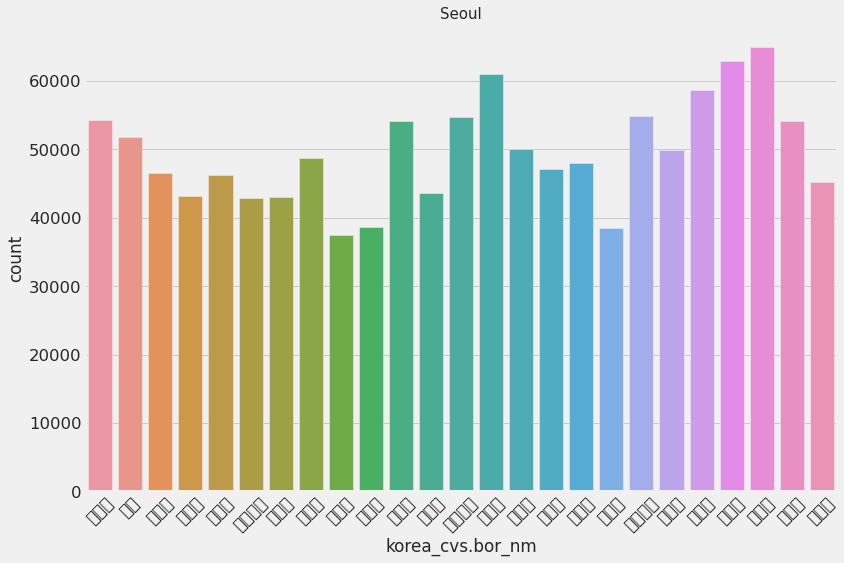

In [61]:
# countplot
plt.figure(figsize=(12,8))
sns.countplot("korea_cvs.bor_nm", data=sub_set_01)
plt.xticks(rotation=45)
plt.title("Seoul", fontsize=15)
plt.show()

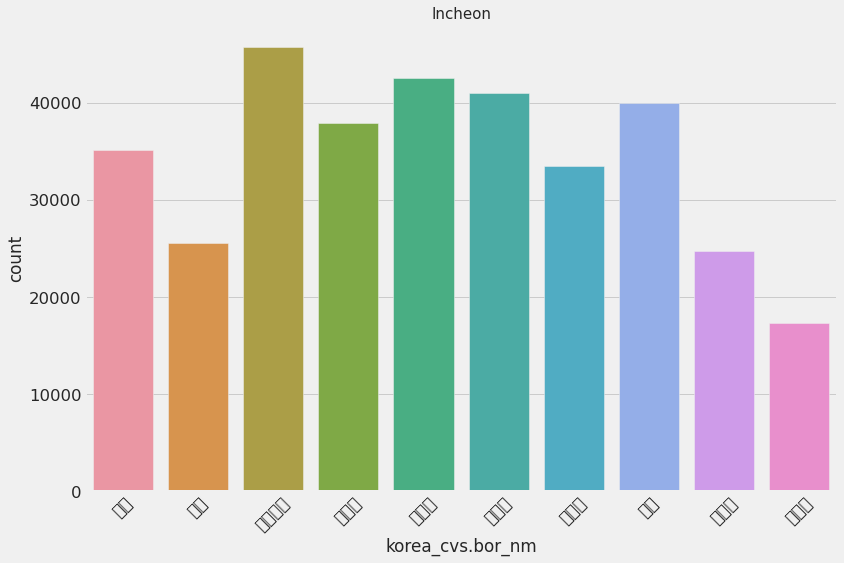

In [62]:
# countplot
plt.figure(figsize=(12,8))
sns.countplot("korea_cvs.bor_nm", data=sub_set_02)
plt.xticks(rotation=45)
plt.title("Incheon", fontsize=15)
plt.show()

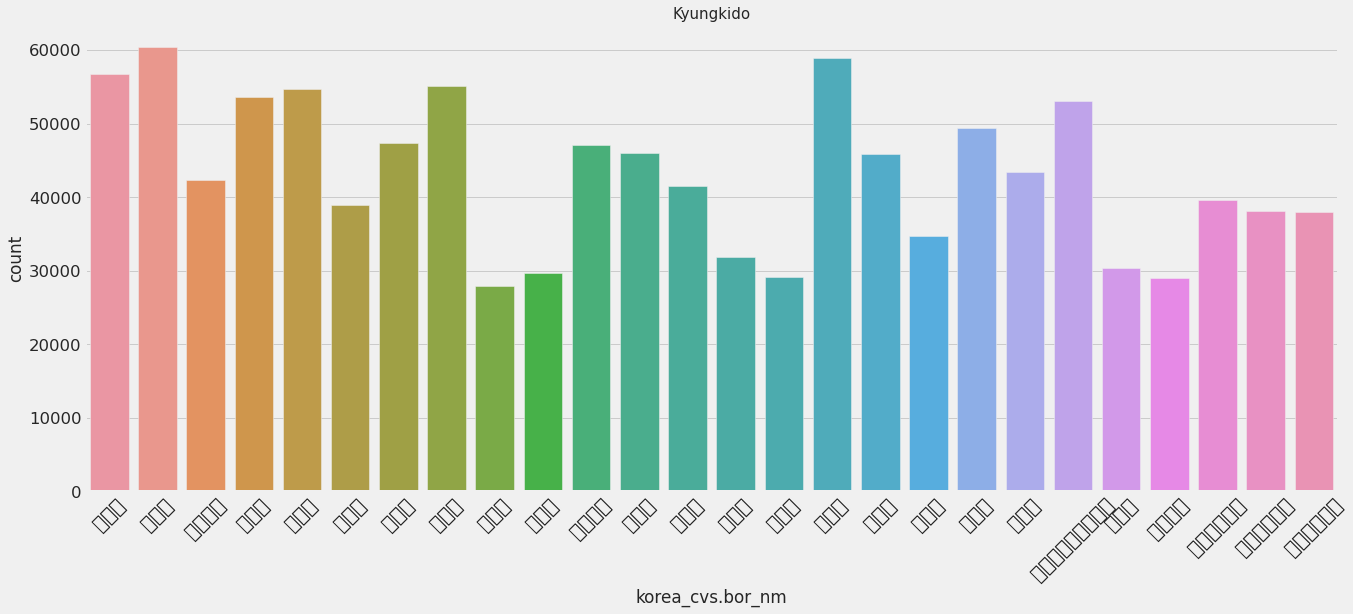

In [67]:
# countplot
plt.figure(figsize=(20,8))
sns.countplot("korea_cvs.bor_nm", data=sub_set_03)
plt.xticks(rotation=45, fontsize=20)
plt.title("Kyungkido", fontsize=15)
plt.show()

In [68]:
gs.head(1)

,korea_cvs.pvn_nm,korea_cvs.sale_dt,korea_cvs.gen_cd,korea_cvs.age_cd,korea_cvs.category,korea_cvs.adj_qty,korea_cvs.bor_nm
0,서울특별시,20160101,F,00~19,라면,7,종로구


(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

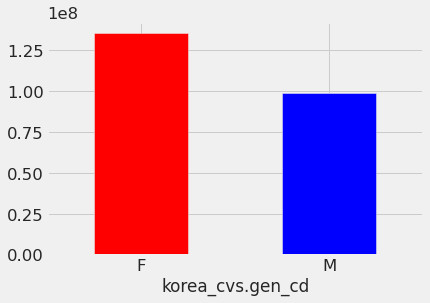

In [72]:
a = gs.groupby("korea_cvs.gen_cd")["korea_cvs.adj_qty"].sum()
a.plot(kind='bar', color=['red', 'blue'])
plt.xticks(rotation="horizontal")

In [77]:
def bor_gen_sum(subset, name):
    a = subset.groupby(["korea_cvs.bor_nm", "korea_cvs.gen_cd"])["korea_cvs.adj_qty"].sum().unstack()
    a.plot(kind='bar', color=['red', 'blue'], figsize=(20, 15))
    plt.xticks(rotation=45)
    plt.title("서울특별시 성별 판매량", fontsize=30)
    plt.legend(["여자", "남자"])

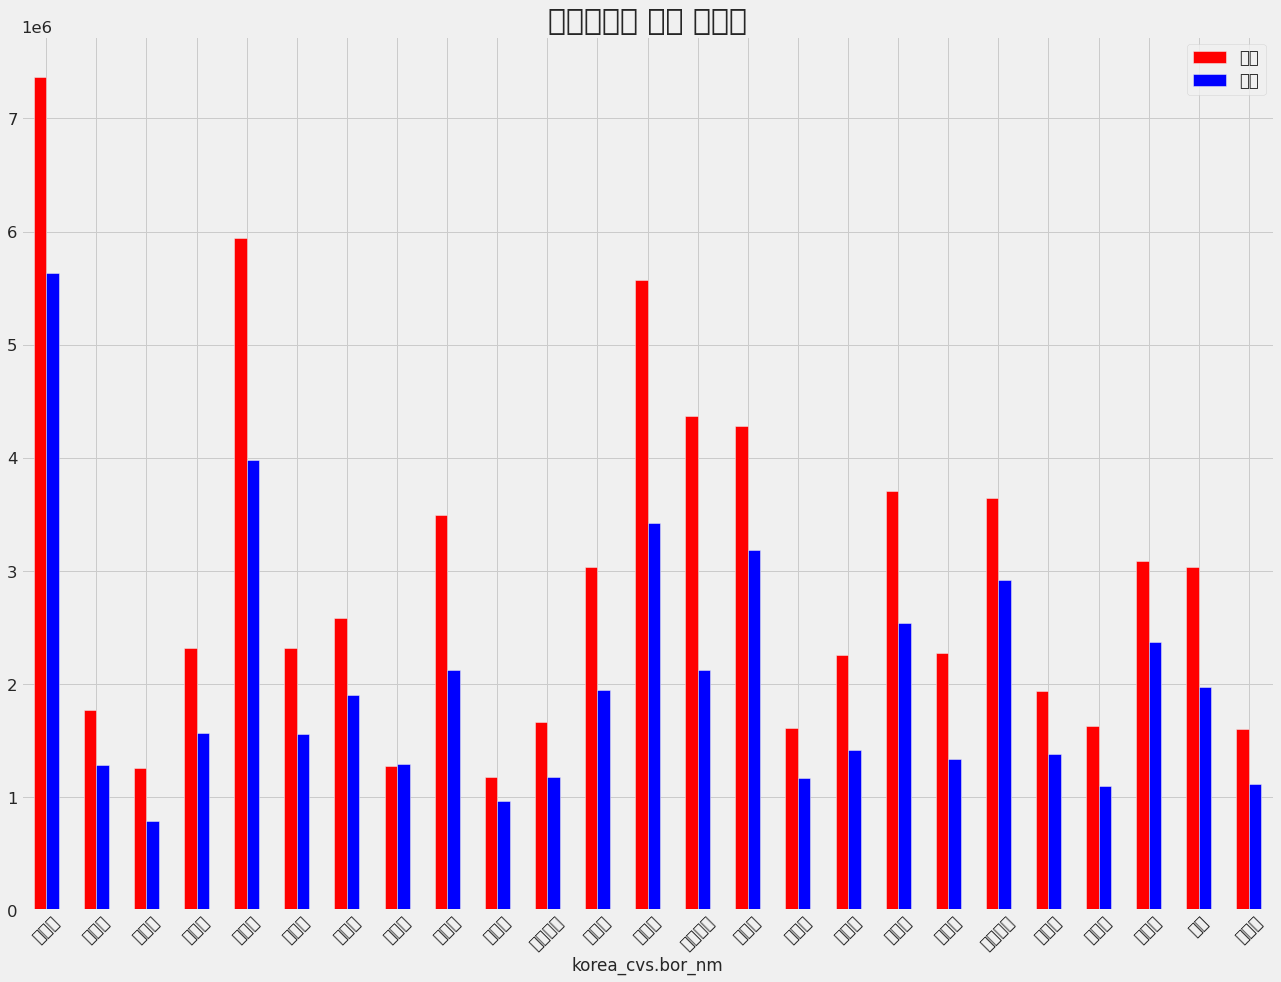

In [78]:
bor_gen_sum(sub_set_01, "서울특별시")

In [74]:
a = sub_set_01.groupby(["korea_cvs.bor_nm", "korea_cvs.gen_cd"])["korea_cvs.adj_qty"].sum().unstack()

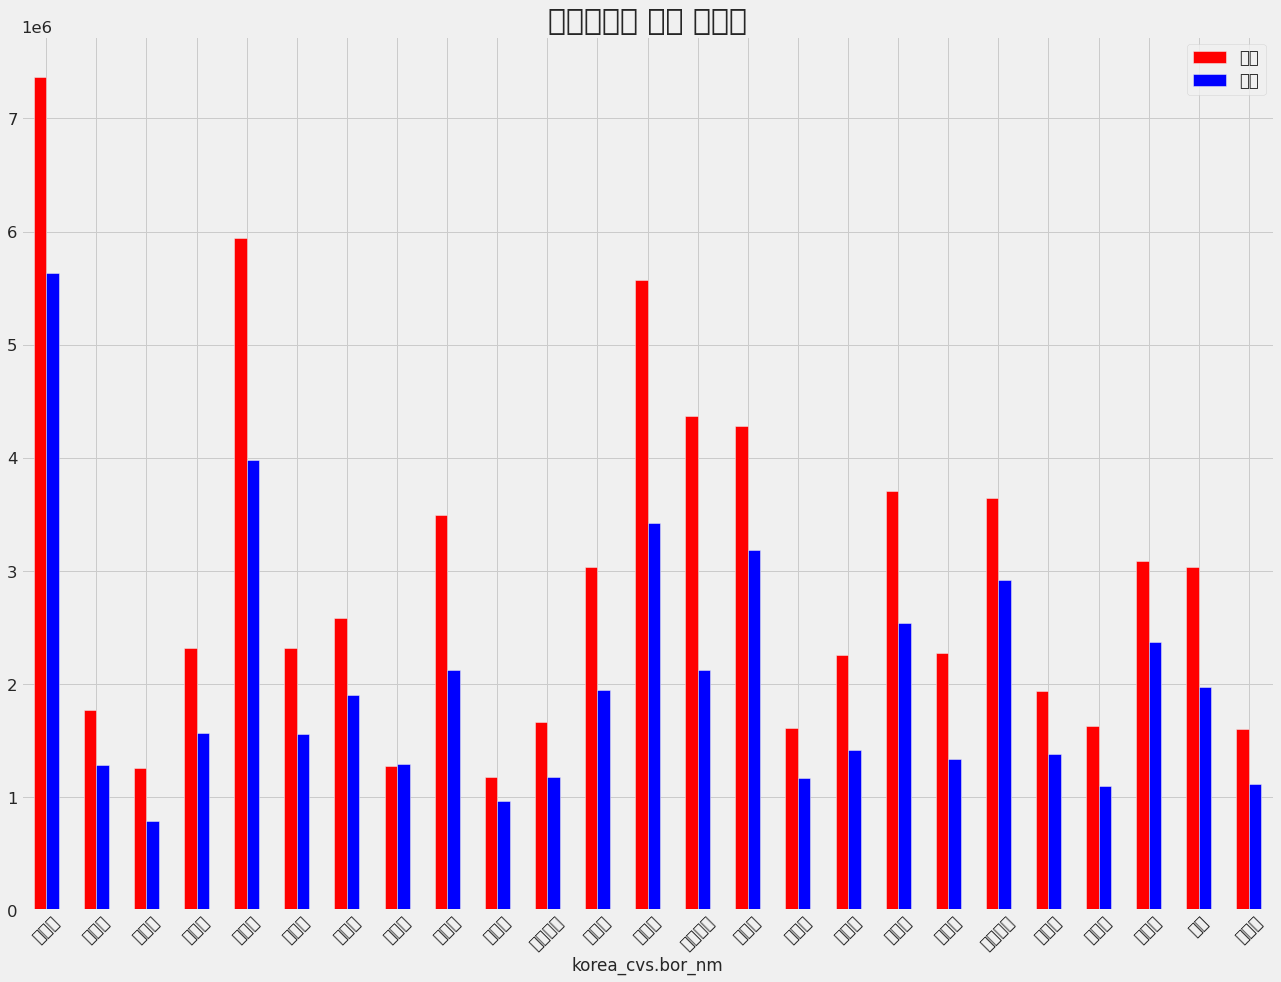

In [76]:
a.plot(kind='bar', color=['red', 'blue'], figsize=(20, 15))
plt.xticks(rotation=45)
plt.title("서울특별시 성별 판매량", fontsize=30)
plt.legend(["여자", "남자"])

In [ ]:
def bor_gen_sum(subset, name):
    a = subset.groupby(["korea_cvs.bor_nm", "korea_cvs.gen_cd"])["korea_cvs.adj_qty"].sum().unstack()
    a.plot(kind='bar', color=['red', 'blue'], figsize=(20, 15))
    plt.xticks(rotation=45)
    plt.title("서울특별시 성별 판매량", fontsize=30)
    plt.legend(["여자", "남자"])

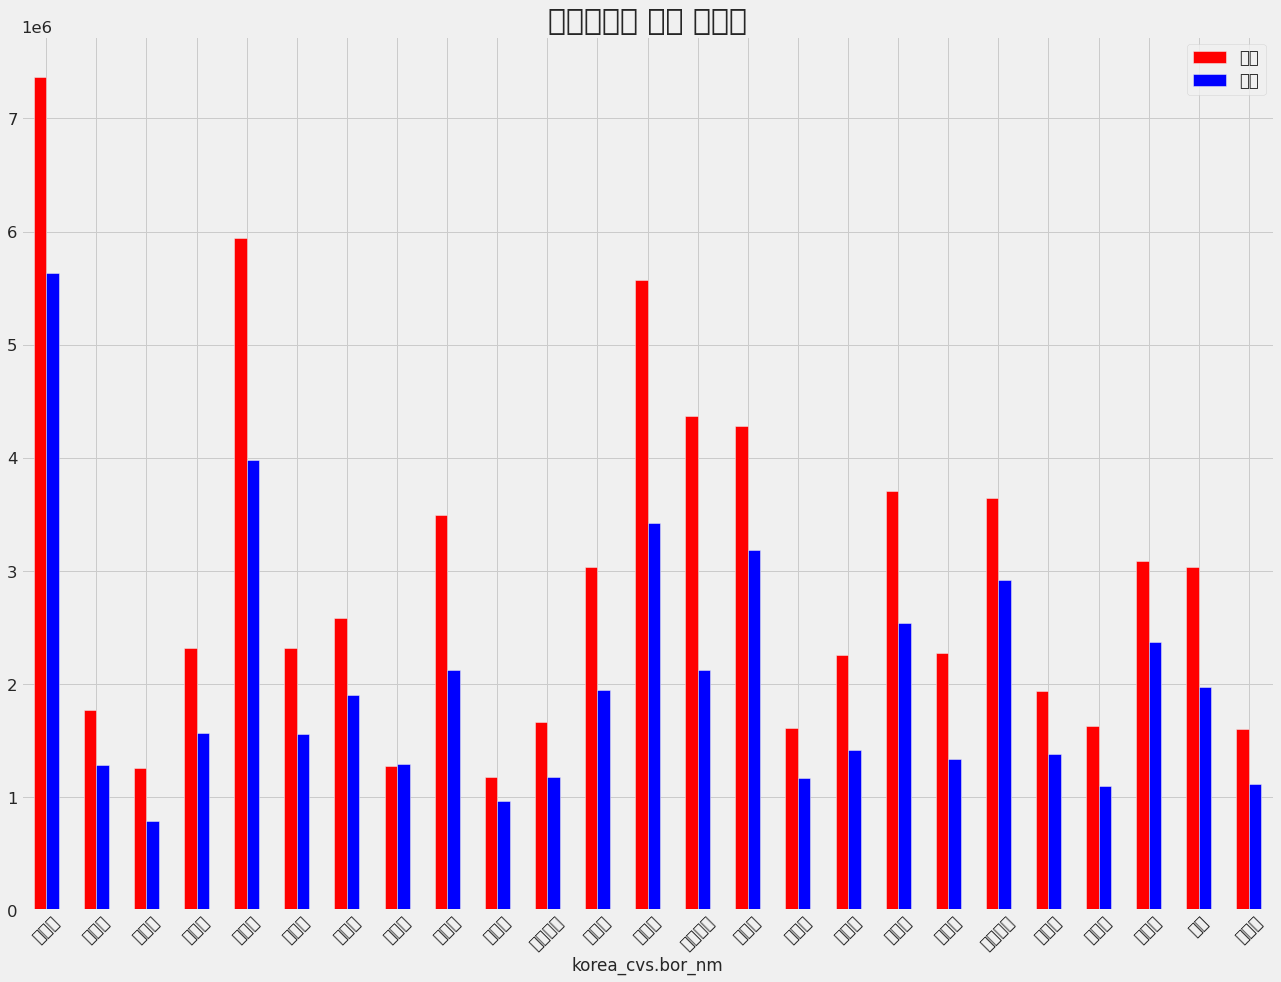

In [79]:
bor_gen_sum(sub_set_01, "서울특별시")

In [81]:
gs.head(1)

,korea_cvs.pvn_nm,korea_cvs.sale_dt,korea_cvs.gen_cd,korea_cvs.age_cd,korea_cvs.category,korea_cvs.adj_qty,korea_cvs.bor_nm
0,서울특별시,20160101,F,00~19,라면,7,종로구


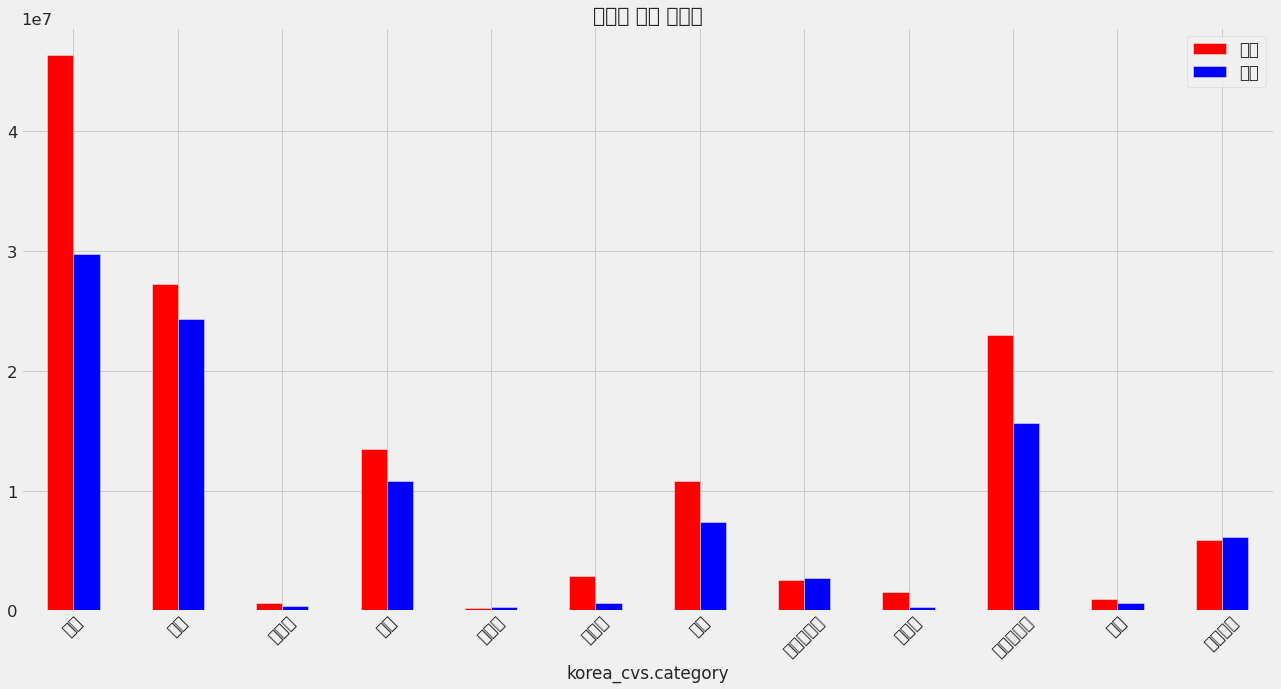

In [84]:
a = gs.groupby(["korea_cvs.category", "korea_cvs.gen_cd"])["korea_cvs.adj_qty"].sum().unstack()
a.plot(kind='bar', color=['red','blue'], figsize=(20, 10))
plt.xticks(rotation=45)
plt.title("품목별 성별 판매량")
plt.legend(["여자", "남자"])

In [86]:
# datetime 형태
gs["korea_cvs.sale_dt"] = gs["korea_cvs.sale_dt"].astype(str) 

In [89]:
gs["korea_cvs.sale_dt"] = gs["korea_cvs.sale_dt"].map(lambda x : str(x))

In [90]:
gs["korea_cvs.sale_dt"] = pd.to_datetime(gs["korea_cvs.sale_dt"])

In [91]:
type(gs["korea_cvs.sale_dt"])

pandas.core.series.Series

In [95]:
gs["day"] = gs["korea_cvs.sale_dt"].dt.weekday

In [96]:
a = gs.groupby(["korea_cvs.category", "day"])["korea_cvs.adj_qty"].sum().unstack()

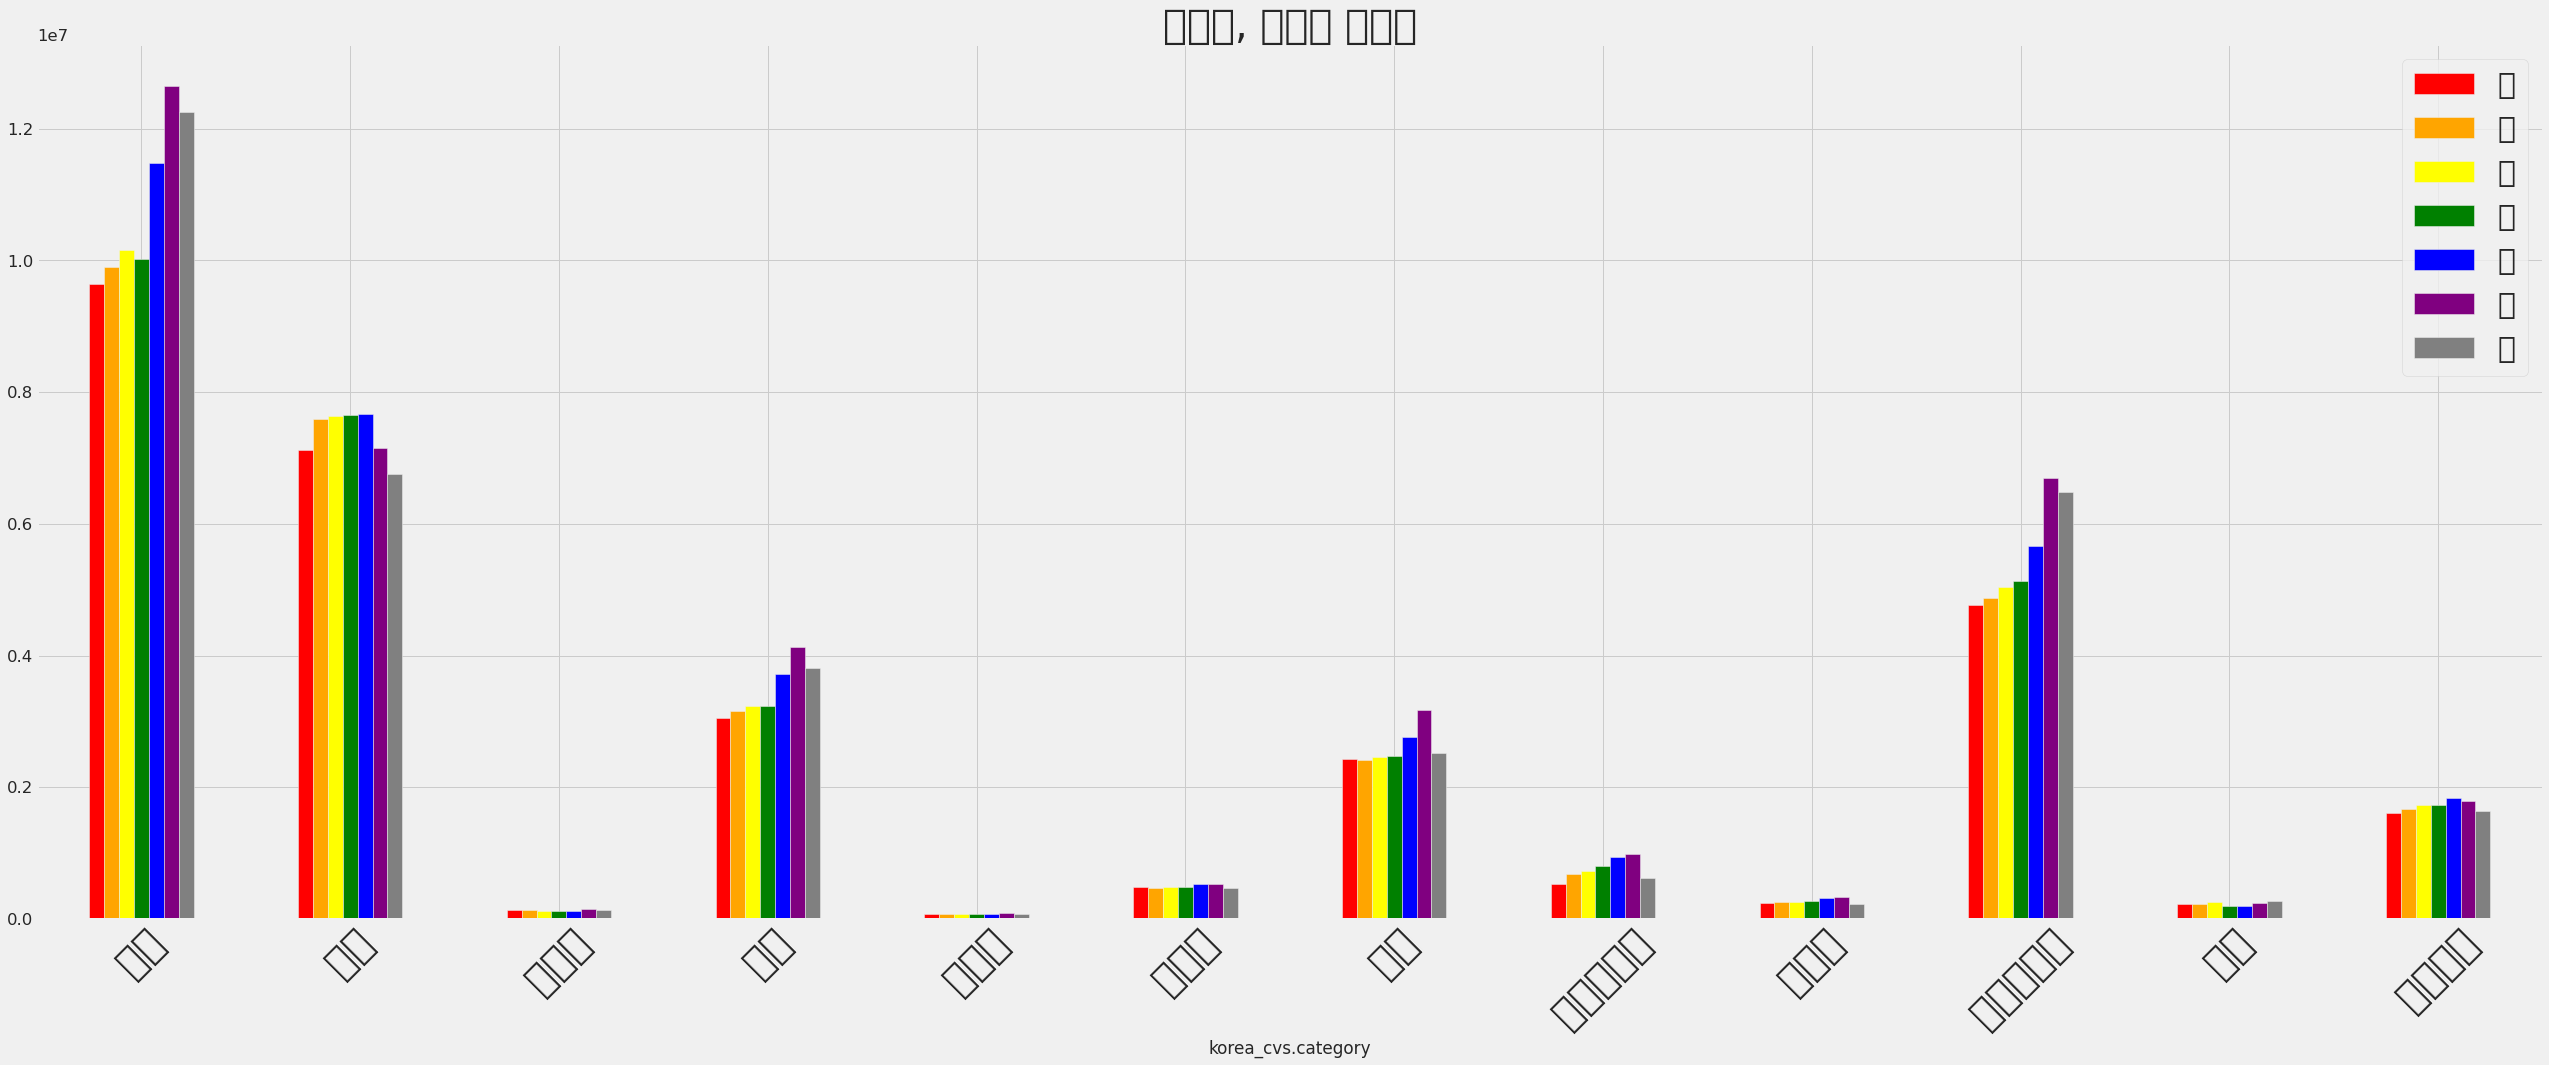

In [108]:
a.plot(kind = 'bar', figsize = (40,15), color=["red", "orange", "yellow", "green", "blue", "purple", "grey" ])
plt.xticks(rotation=45, fontsize = 40)
plt.title("품목별, 요일별 판매량", fontsize=40)
plt.legend(labels="월 화 수 목 금 토 일".split(), fontsize=30)

In [102]:
gs_original = gs.copy()

In [105]:
gs.set_index(("korea_cvs.sale_dt"), inplace=True)
gs.head(1)

,korea_cvs.pvn_nm,korea_cvs.gen_cd,korea_cvs.age_cd,korea_cvs.category,korea_cvs.adj_qty,korea_cvs.bor_nm,day
korea_cvs.sale_dt,,,,,,,
2016-01-01,서울특별시,F,00~19,라면,7,종로구,4


In [106]:
monthly_resample = gs["korea_cvs.adj_qty"].resample("m").sum()

Text(0.5, 1.0, 'sales per month')

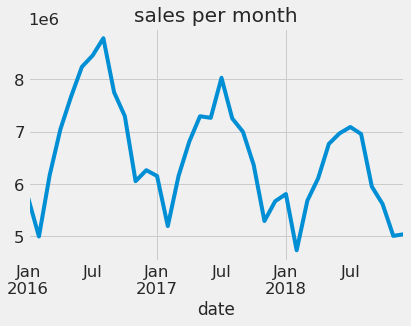

In [107]:
monthly_resample.plot(kind='line')
plt.xlabel("date")
plt.title('sales per month')